# Analyzing Botswana COVID-19 Data

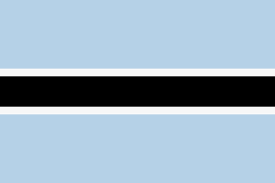

## Background of COVID-19

According to the World Health Organization, COVID-19 is an infectious disease caused by the SARS-CoV-2 virus. Many people who contract the illness will experience mild/moderate respiratory symptoms but will recover. Recovery is typically more long-term and serious for those who contract the illness while having other underlying health conditions. The World Health Organization advises that people stay informed and updated about the disease in order to prevent and slow transmission. The pandemic began in early 2020 and has still been affecting countries in 2022. Because of this, it is important that countries and their civilians stay vigilant against the virus and spreading it to others.

## Data Source

The data is downloaded from [European Centre for Disease Prevention and Control](https://jmu.webex.com/jmu-en/url.php?frompanel=false&gourl=https%3A%2F%2Fgithub.com%2Fxbwei%2Fmachine_learning_in_python%2Fblob%2Fmaster%2FCOVID_19_Data_Analysis.ipynb).

## Botswanan Data on COVID-19

In [22]:
%matplotlib inline
import pandas

In [23]:
df = pandas.read_excel('s3://dauphinais-ia241/covid_data.xls')
Botswana_Data=df.loc[df['countriesAndTerritories']=='Botswana']
Botswana_Data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
7733,14/12/2020,14,12,2020,0,0,Botswana,BW,BWA,2303703.0,Africa,108.911609
7734,13/12/2020,13,12,2020,0,0,Botswana,BW,BWA,2303703.0,Africa,108.911609
7735,2020-12-12 00:00:00,12,12,2020,443,1,Botswana,BW,BWA,2303703.0,Africa,108.911609
7736,2020-11-12 00:00:00,11,12,2020,0,0,Botswana,BW,BWA,2303703.0,Africa,89.681699
7737,2020-10-12 00:00:00,10,12,2020,0,0,Botswana,BW,BWA,2303703.0,Africa,89.681699
7738,2020-09-12 00:00:00,9,12,2020,527,2,Botswana,BW,BWA,2303703.0,Africa,89.681699
7739,2020-08-12 00:00:00,8,12,2020,0,0,Botswana,BW,BWA,2303703.0,Africa,84.082019
7740,2020-07-12 00:00:00,7,12,2020,0,0,Botswana,BW,BWA,2303703.0,Africa,84.082019
7741,2020-06-12 00:00:00,6,12,2020,1521,0,Botswana,BW,BWA,2303703.0,Africa,84.082019
7742,2020-05-12 00:00:00,5,12,2020,0,0,Botswana,BW,BWA,2303703.0,Africa,18.057883


### How many overall covid cases has Botswana had thus far?

In [24]:
Botswana_Data.sum()['cases']

12501

### In what month did the amount of COVID-19 cases spike in the country?

<AxesSubplot:xlabel='month'>

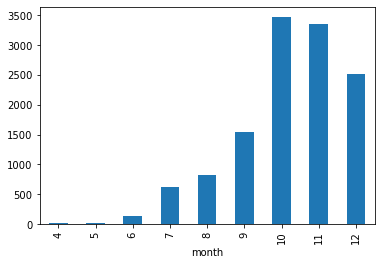

In [25]:
sum_cases_per_day = Botswana_Data.groupby('month').sum()['cases']
sum_cases_per_day.plot.bar()

Overall, Botswana has seen a total of 12,501 cases of COVID-19. The majority of these cases were diagnosed in the month of October, where the amount of cases hit just under 3,500. 

### How many overall deaths has Botswana had thus far? 

In [26]:
Botswana_Data.sum()['deaths']

37

### In what month did the amount of COVID-19 deaths spike in the country?

In [27]:
month_deaths=Botswana_Data.groupby('month').sum()['deaths']
month_deaths[:]

month
4      1
5      0
6      0
7      1
8      4
9     10
10     8
11     7
12     6
Name: deaths, dtype: int64

<AxesSubplot:xlabel='month'>

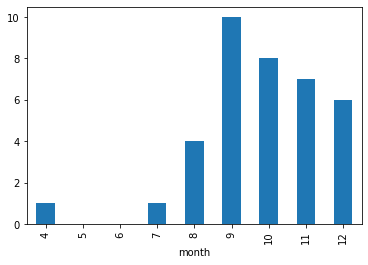

In [28]:
sum_deaths_per_day = Botswana_Data.groupby('month').sum()['deaths']
sum_deaths_per_day.plot.bar()

Out of the 12,501 COVID-19 cases that the country has seen overall, Botswana has only had 37 deaths from the virus. A majority of these deaths took place in the month of September, where the number of deaths hit 10 people.

### Correlation Between Cases and Deaths in Botswana

<AxesSubplot:xlabel='cases', ylabel='deaths'>

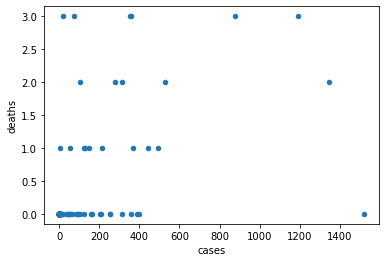

In [51]:
Botswana_Data.plot.scatter(x='cases', y='deaths')

The correlation between the amount of cases and amount of deaths in Botswana is infrequent. As the country witnesses more cases, it is expected that the amount of deaths would also rise; however, as pictured in this scatter plot graph, this is not always the case. As shown, some of the highest number of deaths that the country saw occurred when the cases were between 0-200. Likewise, the data shows that in a case where there were >1,400 cases, there were no deaths (given that singular datapoint). The cluster of datapoints at the bottom lefthand side of the graph is to be expected; when there are 0 cases (or any small number of cases), the correlation is expected to show a small number of deaths. 

### What was the trend in overall monthly infection rate in Botswana?

<AxesSubplot:xlabel='month'>

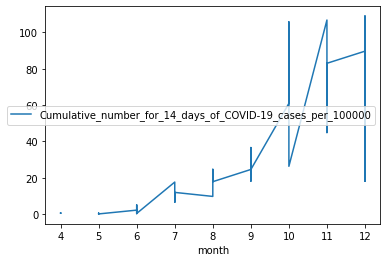

In [46]:
Botswana_Data.sort_values(by=['month']).plot(x='month',y='Cumulative_number_for_14_days_of_COVID-19_cases_per_100000')

## Overall explanation of Botswanan data conclusions

The analyst initially began by encapsulating the overall data (of all countries) to only focus on Botswana's data for the sake of this product. Then, the data for the total amount of COVID-19 cases in the country was extracted and depicted in a bar graph. Next, the analyst looked at data for the total amount of deaths in the country, and illustrated her findings in a another bar graph. Lastly, the overall trend of monthly infection rates in Botswana was plotted with a line graph, with the x-axis representing the months in 2020 (as per the data), and the y-axis representing the rate per 100,000 cases of COVID-19 in Botswana.

## Interpretations of the Diagrams

The first visualization illustrates data for the overall amount of COVID-19 cases in Botswana by month, starting in April and ending in December of 2020. The bar graph shows a slow increase from June to September, and a steep incline from September to October. The peak of this data was in October with a total of 3,500 cases. There was a slight decline from October to December, but not much with the final tally reaching 2,500 cases in December.

The second graph shows a similar data set, but it represents the number of COVID-19 deaths by month from April to December of 2020. There was a slight incline from July to August, and the data ultimately peaked in September with a total of 10 deaths. A slight decline began in September, ending in December with the number of deaths falling to 6 people by the end of the year. 

The correlation graph depicts the unlikely relationship between cases and deaths seen in Botswana. One would predict to see a parallel incline between cases and deaths (i.e., when there are more cases, there are more deaths); however, this was not shown given the data from this country. Instead, the scatter plot illustrates the irreguarity of COVID-19 deaths related to COVID-19 cases. 

The last data visualization shows the rate of infection from April to December of 2020. Botswana's data here was very uneven, with the line graph taking many different dips, pivots, and inclines. The main takeaway was that there were peaks in October, November, and December, showing that the infection rate in Botswana was very sporadic throughout 2020. 

## About the Author

Shay Dauphinais


Email: dauphisx@dukes.jmu.edu

## Conclusion

This product portrays important data pertaining to COVID-19 data in the country of Botswana. This conclusion was limited by the analysts moderate proficiency in Python, but it was supported by the analysts knowledge on the country selected. There was also the limitation of the data only reporting from 2020. The product would be more informative and reliable with an updated dataset. 